### Importing Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # here you import the kmeans algorithm from scikit-learn
import pylab as pl #PyLab is a convenience module that bulk imports matplotlib

In [2]:
%matplotlib inline

In [3]:
# Define path
path=r'C:\\\\Users\\\\maad0\\\\OneDrive\\\\CAREERFOUNDRY Notes\\\\Advanced Analytics_Dashboard Design\\\\11-2023 Final Project'

In [4]:
# Load the Dataset
df_flavors = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_flavors_metrics_regions_chg.csv'), index_col = False)

In [5]:
df_flavors.shape

(1795, 13)

In [6]:
df_flavors.head()

,Unnamed: 0.1,Unnamed: 0,reference_number,company_manufacturer,company_location,review_date,bean_origin,bar_name,cocoa_percent,rating,bean_type,rating_metrics,regions
0,465,465,48,Cote d' Or (Kraft),Belgium,2006,,Sensations Intense,0.70,1.0,,Unpleasant,Unknown
1,245,245,81,Bonnat,France,2006,,One Hundred,1.00,1.5,,Unpleasant,Unknown
2,554,554,63,Dolfin (Belcolade),Belgium,2006,,Noir,0.70,1.5,,Unpleasant,Unknown
3,644,644,105,Felchlin,Switzerland,2006,,Supremo- SF,0.62,2.0,,Disappointing,Unknown
4,878,878,5,Jacque Torres,U.S.A.,2006,Ghana,Trinatario Treasure,0.71,2.0,Trinitario,Disappointing,Africa


In [7]:
# Dropping unecessary columns and creating subset,
flavors_sub = df_flavors.drop(['Unnamed: 0.1', 'Unnamed: 0', 'reference_number', 'company_manufacturer', 'company_location','bean_origin','bar_name','bean_type','rating_metrics', 'regions'], axis = 1)

In [8]:
# Checking head of numerical columns
flavors_sub.head()

,review_date,cocoa_percent,rating
0,2006,0.70,1.0
1,2006,1.00,1.5
2,2006,0.70,1.5
3,2006,0.62,2.0
4,2006,0.71,2.0


### Elbow Technique

In [9]:
# Define the range of potential clusters in the data
num_cl = range(1, 10)

In [10]:
# Defines k-means clusters in the range assigned above
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [11]:
# Changing code to resolve the default value error message ## set the value of 'n_init' to suppress the warning
## Create a list of KMeans objects with different values of n_clusters
kmeans = [KMeans(n_clusters=k, n_init='auto') for k in range(1, 10)]

In [12]:
# Create a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(flavors_sub).score(flavors_sub) for i in range(len(kmeans))]

In [13]:
# Checking results
score

[-15789.17644434541,
 -4532.831019150644,
 -2165.245282817039,
 -1477.4661509171503,
 -1188.4977392888388,
 -918.7972883827526,
 -1028.7040678243236,
 -653.2290117580836,
 -589.544470165857]

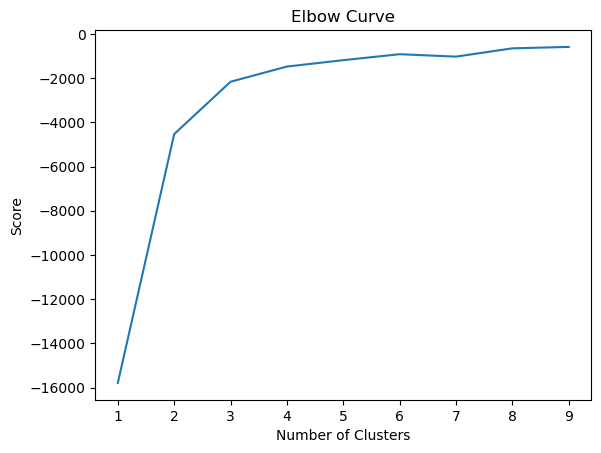

In [14]:
# Plot the elbow curve using PyLab
pl.plot(range(1, 10), score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [15]:
pl.savefig('elbow.png') # save the figure to a file

<Figure size 640x480 with 0 Axes>

### The visualization shows that the number of clusters jumps from two to three on the X-axis, increasing slightly after three.  From this, we can infer that the 'elbow point' would be three, making three the optimal number of clusters.

### KMeans and Scatterplots

In [16]:
# Create the k-means object
kmeans= KMeans(n_clusters=3, n_init='auto')

In [17]:
# Fit the k-means object to the data
kmeans.fit(flavors_sub)

KMeans(n_clusters=3, n_init='auto')

In [18]:
# Perform clustering using the k-means nodel and assign the results to new 'clusters' column
flavors_sub['clusters'] = kmeans.fit_predict(flavors_sub)

In [19]:
# Checking head
flavors_sub.head()

,review_date,cocoa_percent,rating,clusters
0,2006,0.70,1.0,0
1,2006,1.00,1.5,0
2,2006,0.70,1.5,0
3,2006,0.62,2.0,0
4,2006,0.71,2.0,0


In [20]:
# Check the frequency of each unique value in the 'clusters' column
flavors_sub['clusters'].value_counts()

1    959
2    594
0    242
Name: clusters, dtype: int64

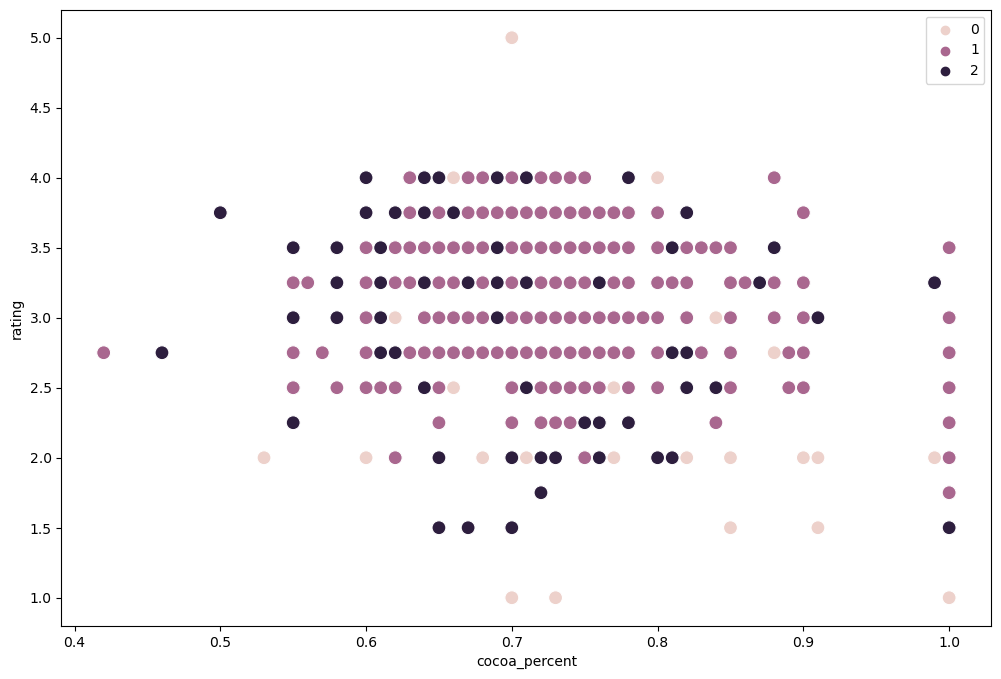

In [21]:
# Plot the clusters for the Cocoa Percent and Rating variables 
plt.figure(figsize = (12,8))
ax=sns.scatterplot(x=flavors_sub['cocoa_percent'], y=flavors_sub['rating'], hue = kmeans.labels_, s = 100)
ax.grid(False)
plt.xlabel('cocoa_percent')
plt.ylabel('rating')
plt.show()

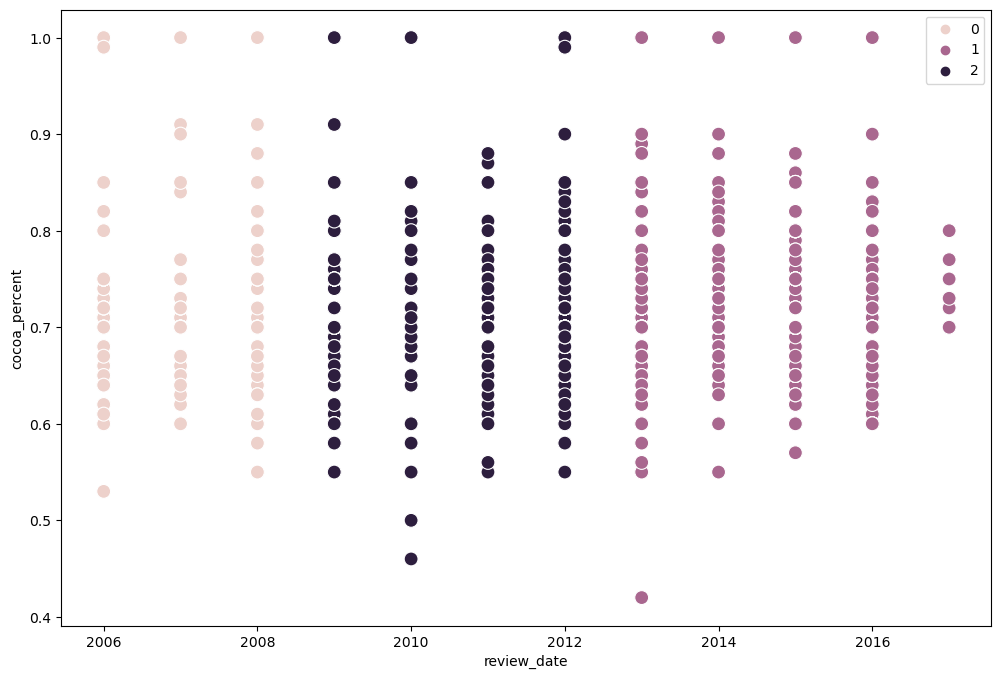

In [22]:
# Plot the clusters for the Review Date and Cocoa Percent variables 
plt.figure(figsize = (12,8))
ax=sns.scatterplot(x=flavors_sub['review_date'], y=flavors_sub['cocoa_percent'], hue = kmeans.labels_, s = 100)
ax.grid(False)
plt.xlabel('review_date')
plt.ylabel('cocoa_percent')
plt.show()

###  Conclusion The third cluster (the darkest of all the clusters), coded as 2 in the legend, is the most populated cluster. In the first scatterplot, we can see that the points start to cluster more between the cocoa percentages of 0.65 through 0.75 percent, reflecting the highest rating of chocolate bars with a rating of 3.5.  The second scatterplot also shows a more populated cluster, coded as 2 in the legend between 2014 and after, with the purple cluster, coded as 1 being the second most highest populated cluster.

### Descriptive Statistics

In [23]:
flavors_sub.loc[flavors_sub['clusters'] == 2, 'cluster'] = 'dark'
flavors_sub.loc[flavors_sub['clusters'] == 1, 'cluster'] = 'purple'
flavors_sub.loc[flavors_sub['clusters'] == 0, 'cluster'] =  'pink'

In [24]:
flavors_sub.groupby('cluster').agg({'cocoa_percent': ['mean', 'median'], 'rating': ['mean', 'median'], 'review_date': ['mean', 'median']})

cocoa_percent           rating         review_date        
                 mean median      mean median         mean  median
cluster                                                           
dark         0.710101    0.7  3.172559   3.25  2010.727273  2011.0
pink         0.719835    0.7  3.086777   3.00  2007.086777  2007.0
purple       0.720563    0.7  3.219239   3.25  2014.637122  2015.0

In [25]:
flavors_sub.groupby('cluster').agg({'cocoa_percent': ['std'], 'rating': ['std'], 'review_date': ['std']})

,cocoa_percent,rating,review_date
,std,std,std
cluster,,,
dark,0.062354,0.480326,1.127472
pink,0.076803,0.668815,0.822852
purple,0.059599,0.411021,1.105933


### The dark cluster has the slightest variation from the mean, which indicates that the values are clustered tightly around the mean.   In reviewing the variables, the dark cluster is the most consistent variable, whereas the pink cluster has the highest variation from the mean.

### What could these results be useful for in future steps of an analytics pipeline
#### These statistics can help identify patterns and trends in the data as well as determine which variable is the most reliable and stable; for example, the cocoa percentage is an important factor used to assess the quality of the chocolate bar, so we can use the standard deviation to determine which cluster has the most consistent cocoa percentage value, as referenced in the above standard deviation results.

In [27]:
# Export dataframe to csv
flavors_sub.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'flavors_sub_clustering.csv'))